**Praktikum Komputasi Big Data Pertemuan 2**
<br>
Nama : Faris Rasyid
<br>
NPM : 50421483
<br>
Kelas : 2IA22









---



### **TUGAS**

1. Silahkan modifikasi kode operasi yang ada menggunakan library perhitungan berbasis GPU
(Library Cupy)
2. Bacalah dataset yang berada tersimpan url
https://raw.githubusercontent.com/supasonicx/ATA-praktikum-01/main/concrete.csv
3. Periksa dataset apakah terdapat data yang bernilai null dengan menggunakan fungsi .isnull()
4. Buatlah sebuah histogram dari data kolom 'strength'.
5. Buatlah diagram boxplot dari dataset yang ada.
6. Hitung karakteristik statistik (standar deviasi, variance, mean, median) dari masing-masing
kolom data.
7. Buatlah correlation map dari dataset tersebut.
8. Hitung covariance dari kolom data yang diminta
9. Hitung pearson correlation dan spearsman correlation dari kolom data yang diminta
10. Hitung nilai hipotesis testing untuk kolom age dan strength.

2. Bacalah dataset yang berada tersimpan url
https://raw.githubusercontent.com/supasonicx/ATA-praktikum01/main/concrete.cs

In [62]:
# BERFUNGSI IMPORT LIBRARY
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from scipy import stats
plt.style.use("ggplot")
import warnings
warnings.filterwarnings("ignore")
from scipy import stats

In [63]:
# MEMBACA DATA DARI LINK
url_data = "https://raw.githubusercontent.com/supasonicx/ATA-praktikum-01/main/concrete.csv"
data = pd.read_csv(url_data)

In [64]:
## MENAMPILKAN OUTPUT 5 BARIS AWAL
data.head()


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


3.Periksa dataset apakah terdapat data yang bernilai null dengan
menggunakan fungsi .isnull()

In [65]:
# MENAMPILKAN DIMENSI DATASET
print('Shape dataset', data.shape)


Shape dataset (1030, 9)


In [66]:
# MENAMPILKAN KOLOM DATASET
print(data.columns)

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')


In [67]:
# MENAMPILKAN DATASET APAKAH BERNILAI NULL DENGAN MENGUNAKAN FUNGSI .ISNNULL()
print("mean stength :",data['strength'].isnull())

mean stength : 0       False
1       False
2       False
3       False
4       False
        ...  
1025    False
1026    False
1027    False
1028    False
1029    False
Name: strength, Length: 1030, dtype: bool


4.Buatlah sebuah histogram dari data kolom 'strength'.

(array([0.00217712, 0.00399138, 0.01015989, 0.01269986, 0.02104548,
        0.01451412, 0.01088559, 0.01814265, 0.02757683, 0.01596553,
        0.01995692, 0.02975395, 0.01814265, 0.03047966, 0.02249689,
        0.01850551, 0.012337  , 0.00979703, 0.01451412, 0.01269986,
        0.00907133, 0.00798277, 0.00507994, 0.00580565, 0.00580565,
        0.00362853, 0.00362853, 0.00181427, 0.00362853, 0.00145141]),
 array([ 2.33      ,  5.00566667,  7.68133333, 10.357     , 13.03266667,
        15.70833333, 18.384     , 21.05966667, 23.73533333, 26.411     ,
        29.08666667, 31.76233333, 34.438     , 37.11366667, 39.78933333,
        42.465     , 45.14066667, 47.81633333, 50.492     , 53.16766667,
        55.84333333, 58.519     , 61.19466667, 63.87033333, 66.546     ,
        69.22166667, 71.89733333, 74.573     , 77.24866667, 79.92433333,
        82.6       ]),
 <BarContainer object of 30 artists>)

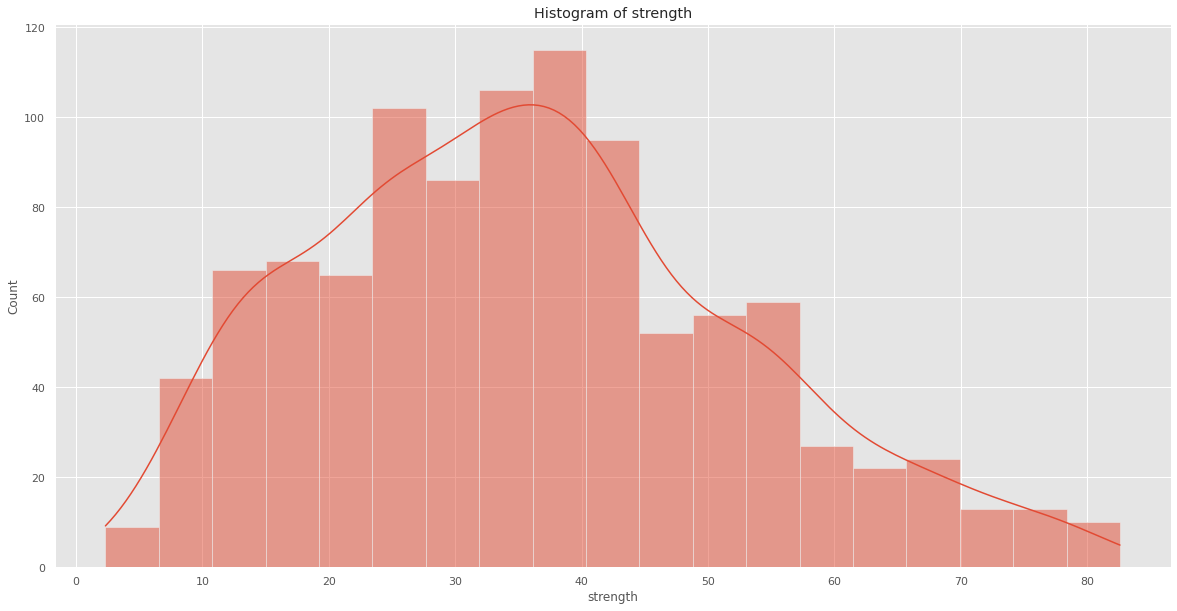

In [68]:
## HISTOGRAM DATA KOLOM STRENGTH
plt.figure(figsize=(20,10))
plt.title('Histogram of strength')
sns.histplot(data,x='strength',kde=True)
plt.hist(data['strength'], density=True, bins=30, label="Data")


5. Buatlah diagram boxplot dari dataset yang ada.

In [69]:
# HISTOGRAM STREGH
q1 = data[["strength"]].quantile(0.35)
q2 = data[["strength"]].quantile(0.85)
iqr = q2 -q1
print(iqr)


strength    26.099
dtype: float64


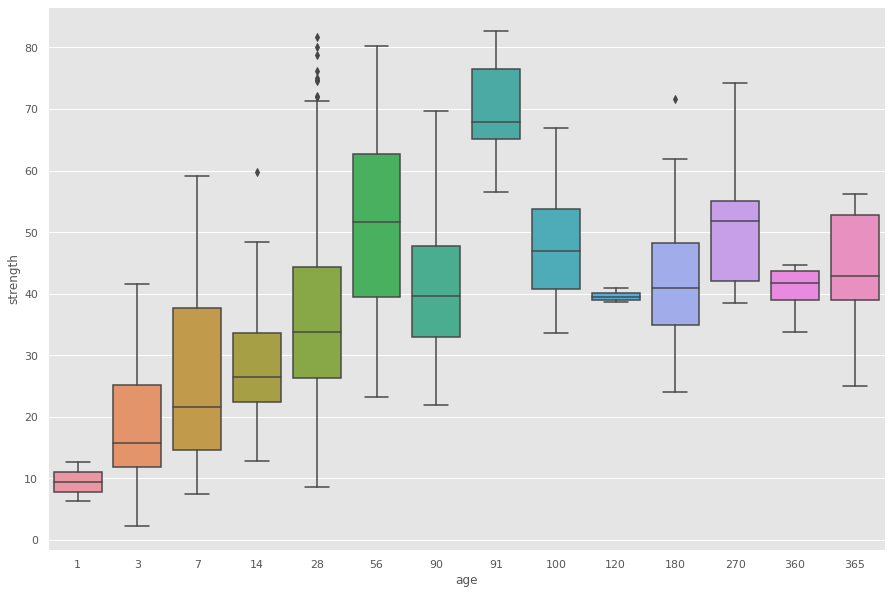

In [70]:
plt.figure(figsize=(15,10))
sns.boxplot(x='age', y='strength', data=data)
plt.show()

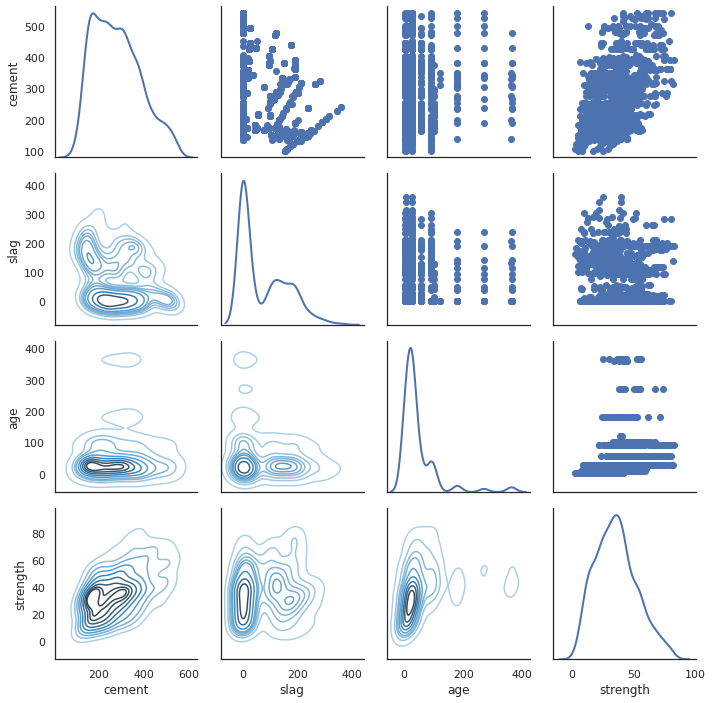

In [71]:
# HUBUNGAN ANTAR DATA 'cement', 'slag', 'age', dan 'strengh'
sns.set(style = "white")
df = data.loc[:,["cement","slag","age","strength"]]
g = sns.PairGrid(df,diag_sharey = False)
g.map_lower(sns.kdeplot,cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot,lw = 2)
plt.show()

6. Hitung karakteristik statistik (standar deviasi, variance, mean,
median) dari masing-masing kolom data.

In [72]:
# MENGHITUNG NILAI KARAKTERISTIK MASING KOLOM DENGAN PERINTAH DESCRIBE
print("standart deviation :", data.strength.std())
print("variance :", data.strength.var())
print("mean :", data.strength.mean())
print("mdian :", data.strength.median())


standart deviation : 16.705741961912512
variance : 279.08181449800446
mean : 35.817961165048544
mdian : 34.445


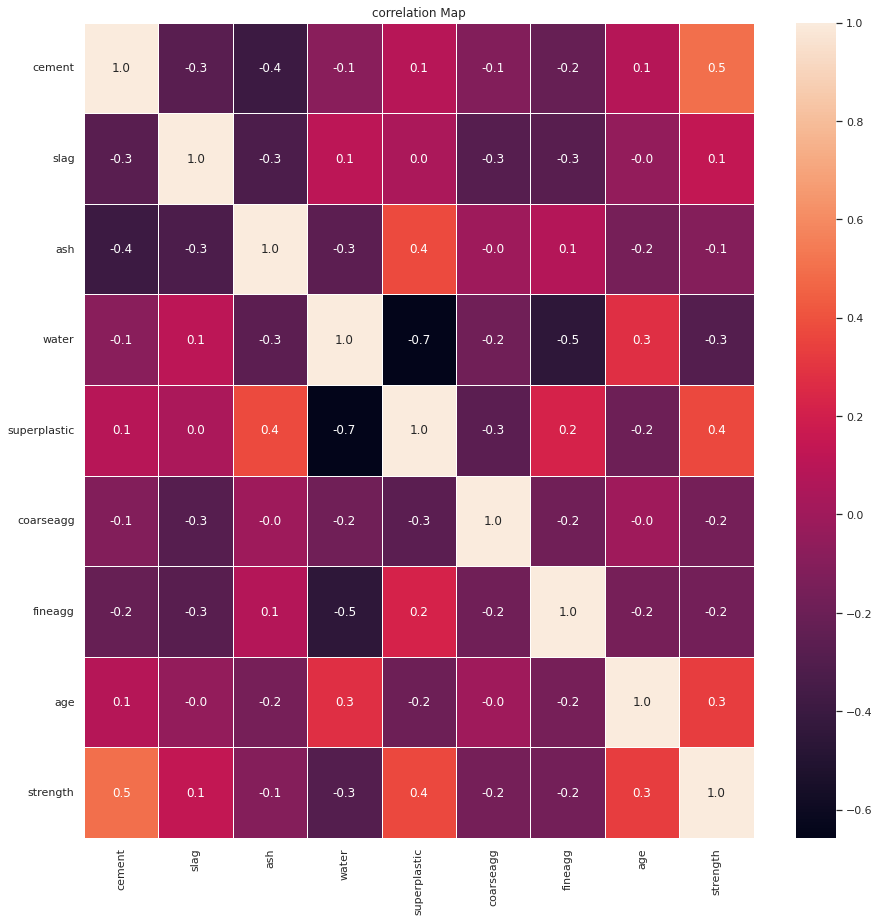

In [73]:
# Buatlah diagram heatmap dari setiap kolom yang ada dengan library seaborn
f,ax=plt.subplots(figsize = (15,15))
sns.heatmap(data.corr(),annot= True,linewidths=0.5,fmt = ".1f" ,ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('correlation Map')
plt.savefig('graph.png')
plt.show()


8. Hitung covariance dari kolom data yang diminta

In [74]:
# Bandingkan nilai covariance dari data age, strength dan strength dan cement
print("Covariance antara age dan strength: ", data['age'].cov(data['strength']))
print("Covariance antara strength dan cement: ", data['strength'].cov(data['cement']))


Covariance antara age dan strength:  347.05975751743136
Covariance antara strength dan cement:  869.1430218800419


9. Hitung pearson correlation dan spearsman correlation dari
kolom data yang diminta

In [75]:
# PEARSON CORRELATION
p1 = data.loc[:,["age","strength"]].corr(method= "pearson")
p2 = data.strength.cov(data.age)/(data.strength.std()*data.age.std())
print('Pearson correlation: ')
print(p1)
print('Pearson correlation: ' ,p2)

Pearson correlation: 
               age  strength
age       1.000000  0.328873
strength  0.328873  1.000000
Pearson correlation:  0.32887300077998743


In [76]:
# SPEARMAN'S CORRELATION
ranked_data = data.rank()
spearman_corr = ranked_data.loc[:,["age","strength"]].corr(method= "pearson")
print("Spearman's correlation: ")
print(spearman_corr)

Spearman's correlation: 
               age  strength
age       1.000000  0.596028
strength  0.596028  1.000000


10. Hitung nilai hipotesis testing untuk kolom age dan strength.

In [77]:
# MENAMPILKAN NILAI HIPOTESIS
statistic, p_value = stats.ttest_rel(data.age,data.strength)
print('HIPOTESIS AGE DAN STRENGHT adalah: ',p_value)


HIPOTESIS AGE DAN STRENGHT adalah:  1.545311719208927e-07


**Penjelasan**:Code tersebut bertujuan untuk menampilkan nilai hipotesis uji t-test yang dilakukan terhadap kolom age dan strength pada dataset data. Uji t-test dilakukan untuk menguji apakah rata-rata dari kedua kolom tersebut sama atau tidak.